# WeatherPy

In [7]:
#import dependencies, setup, and other necessary items
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from config import openweather_apikey
from citipy import citipy
import json

#range for latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [8]:
#lists to hold city data and latitude/longitude data
lat_lngs = []
cities = []


#finding random latitudes and longitudes, then putting them together
lats = np.random.uniform(lat_range[0], lat_range[1], size=1700)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1700)
lat_lngs = list(zip(lats, lngs))

#finding the closest city to each lat/lng pair
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #add city to list (if not there already)
    if city not in cities:
        cities.append(city)

#make sure there are enought cities (500+ to ensure at least 500 are found)
print(f"Number of cities in list: {len(cities)}")
    

Number of cities in list: 670


# Perform API Calls

In [10]:
#create a counter variable
count = 0

#create a dictionary to hold json results
city_weather_results = {}

#signal the start of data retrieval
print("Beginning Data Retrieval")
print("------------------------------")
#creating a try loop in case the city doesn't exist in the api
try:
    #looping through cities in the cities list
    for city in cities:
        #using city name to search for cities
        city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={openweather_apikey}"
        #call api and convert to json
        city_json = requests.get(city_url).json()
        #make the json pretty
        pretty_city = json.dumps(city_json)
        #print the log
        print(f"Processing Record {count + 1} | {city}")
        #append dictionary response to dictionary with a key of the count number
        city_weather_results[city] = json.loads(pretty_city)
        #add one to the count
        count += 1
        #pause call to not exceed call limit (60 per minute)
        time.sleep(6)
except KeyError:
    #print error message
    print("City not found. Skipping...")
    
#signal the end of data retrieval
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------------
Processing Record 1 | qui nhon
Processing Record 2 | mkushi
Processing Record 3 | avarua
Processing Record 4 | faanui
Processing Record 5 | bluff
Processing Record 6 | snasa
Processing Record 7 | saint george
Processing Record 8 | price
Processing Record 9 | williams lake
Processing Record 10 | ambatondrazaka
Processing Record 11 | albany
Processing Record 12 | taolanaro
Processing Record 13 | kristiansund
Processing Record 14 | ginda
Processing Record 15 | carnarvon
Processing Record 16 | port hope
Processing Record 17 | chuy
Processing Record 18 | bad rappenau
Processing Record 19 | mataura
Processing Record 20 | arai
Processing Record 21 | amderma
Processing Record 22 | consolacion del sur
Processing Record 23 | semey
Processing Record 24 | saskylakh
Processing Record 25 | port-gentil
Processing Record 26 | hidrolandia
Processing Record 27 | new norfolk
Processing Record 28 | sentyabrskiy
Processing Record 29 | villeta
Processi

Processing Record 249 | palmer
Processing Record 250 | huautla
Processing Record 251 | korla
Processing Record 252 | shaoguan
Processing Record 253 | honningsvag
Processing Record 254 | pundaguitan
Processing Record 255 | kungurtug
Processing Record 256 | sioux lookout
Processing Record 257 | stornoway
Processing Record 258 | lorengau
Processing Record 259 | coquimbo
Processing Record 260 | itatinga
Processing Record 261 | tautira
Processing Record 262 | boromo
Processing Record 263 | te anau
Processing Record 264 | upernavik
Processing Record 265 | zarate
Processing Record 266 | dubti
Processing Record 267 | kalmunai
Processing Record 268 | independencia
Processing Record 269 | saint-joseph
Processing Record 270 | khandyga
Processing Record 271 | shenjiamen
Processing Record 272 | curup
Processing Record 273 | dakar
Processing Record 274 | thompson
Processing Record 275 | guerrero negro
Processing Record 276 | fontem
Processing Record 277 | scarborough
Processing Record 278 | souillac

Processing Record 495 | banes
Processing Record 496 | sorong
Processing Record 497 | senno
Processing Record 498 | aktau
Processing Record 499 | bid
Processing Record 500 | lavrentiya
Processing Record 501 | tommot
Processing Record 502 | tucupita
Processing Record 503 | wanaka
Processing Record 504 | mareeba
Processing Record 505 | belaya gora
Processing Record 506 | kapfenberg
Processing Record 507 | maniwaki
Processing Record 508 | bajo baudo
Processing Record 509 | beloha
Processing Record 510 | nizwa
Processing Record 511 | necochea
Processing Record 512 | avera
Processing Record 513 | berdigestyakh
Processing Record 514 | pozoblanco
Processing Record 515 | hvide sande
Processing Record 516 | altagracia de orituco
Processing Record 517 | deputatskiy
Processing Record 518 | acarau
Processing Record 519 | satitoa
Processing Record 520 | kampen
Processing Record 521 | bandar-e lengeh
Processing Record 522 | linguere
Processing Record 523 | severnyy
Processing Record 524 | dickinson
P

In [17]:
#create dataframe from results
city_weather_df = pd.DataFrame.from_dict(city_weather_results)
#export data frame to csv
city_weather_df.to_csv("output_data/cities.csv")

city_weather_df.head()

,qui nhon,mkushi,avarua,faanui,bluff,snasa,saint george,price,williams lake,ambatondrazaka,...,hongjiang,kambove,barcelos,waipawa,puerto leguizamo,abatskoye,el cope,puerto baquerizo moreno,itoman,zachary
coord,"{'lon': 109.2333, 'lat': 13.7667}","{'lon': 29.3939, 'lat': -13.6202}","{'lon': -159.775, 'lat': -21.2078}","{'lon': -151.75, 'lat': -16.4833}","{'lon': 168.3333, 'lat': -46.6}","{'lon': 12.3778, 'lat': 64.2457}","{'lon': -113.5841, 'lat': 37.1041}","{'lon': -110.8107, 'lat': 39.5994}","{'lon': -122.1445, 'lat': 52.1415}","{'lon': 48.4167, 'lat': -17.8333}",...,"{'lon': 109.9956, 'lat': 27.11}","{'lon': 26.5969, 'lat': -10.8764}","{'lon': -8.6151, 'lat': 41.5388}","{'lon': 175.5153, 'lat': -41.4122}","{'lon': -74.7819, 'lat': -0.1934}","{'lon': 70.4555, 'lat': 56.2875}","{'lon': -80.6, 'lat': 8.6167}","{'lon': -89.6, 'lat': -0.9}","{'lon': 127.6694, 'lat': 26.1247}","{'lon': -91.1565, 'lat': 30.6485}"
weather,"[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...",...,"[{'id': 500, 'main': 'Rain', 'description': 'l...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '..."
base,stations,stations,stations,stations,stations,stations,stations,stations,stations,stations,...,stations,stations,stations,stations,stations,stations,stations,stations,stations,stations
main,"{'temp': 299.91, 'feels_like': 301.98, 'temp_m...","{'temp': 287.43, 'feels_like': 287.08, 'temp_m...","{'temp': 302.15, 'feels_like': 304.99, 'temp_m...","{'temp': 301.28, 'feels_like': 303.93, 'temp_m...","{'temp': 286.48, 'feels_like': 285.67, 'temp_m...","{'temp': 275.35, 'feels_like': 275.35, 'temp_m...","{'temp': 292.36, 'feels_like': 290.7, 'temp_mi...","{'temp': 282.15, 'feels_like': 278.46, 'temp_m...","{'temp': 292.15, 'feels_like': 290.6, 'temp_mi...","{'temp': 291.71, 'feels_like': 292.18, 'temp_m...",...,"{'temp': 289.77, 'feels_like': 289.99, 'temp_m...","{'temp': 286.8, 'feels_like': 286.7, 'temp_min...","{'temp': 286.43, 'feels_like': 286.27, 'temp_m...","{'temp': 291.96, 'feels_like': 291.36, 'temp_m...","{'temp': 296.8, 'feels_like': 297.62, 'temp_mi...","{'temp': 281.7, 'feels_like': 279.4, 'temp_min...","{'temp': 298.56, 'feels_like': 299.32, 'temp_m...","{'temp': 298.4, 'feels_like': 299.2, 'temp_min...","{'temp': 296.47, 'feels_like': 296.89, 'temp_m...","{'temp': 292.83, 'feels_like': 292.86, 'temp_m..."
visibility,10000,10000,10000,10000,10000,77,10000,10000,10000,10000,...,6411,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [18]:
#cleaning the dataframe
#dropping the unnecessary base row
cleaned_city_weather_df = city_weather_df.drop(city_weather_df.index[2])
#dropping the rain, message, and snow rows (unnecessary)
cleaned_city_weather_df = cleaned_city_weather_df[:-3]
#dropping columns that had NaN values
cleaned_city_weather_df = cleaned_city_weather_df.dropna(axis=1)
#remove the unnecessary cod row
cleaned_city_weather_df = cleaned_city_weather_df[:-1]

cleaned_city_weather_df

,qui nhon,mkushi,avarua,faanui,bluff,snasa,saint george,price,williams lake,ambatondrazaka,...,hongjiang,kambove,barcelos,waipawa,puerto leguizamo,abatskoye,el cope,puerto baquerizo moreno,itoman,zachary
coord,"{'lon': 109.2333, 'lat': 13.7667}","{'lon': 29.3939, 'lat': -13.6202}","{'lon': -159.775, 'lat': -21.2078}","{'lon': -151.75, 'lat': -16.4833}","{'lon': 168.3333, 'lat': -46.6}","{'lon': 12.3778, 'lat': 64.2457}","{'lon': -113.5841, 'lat': 37.1041}","{'lon': -110.8107, 'lat': 39.5994}","{'lon': -122.1445, 'lat': 52.1415}","{'lon': 48.4167, 'lat': -17.8333}",...,"{'lon': 109.9956, 'lat': 27.11}","{'lon': 26.5969, 'lat': -10.8764}","{'lon': -8.6151, 'lat': 41.5388}","{'lon': 175.5153, 'lat': -41.4122}","{'lon': -74.7819, 'lat': -0.1934}","{'lon': 70.4555, 'lat': 56.2875}","{'lon': -80.6, 'lat': 8.6167}","{'lon': -89.6, 'lat': -0.9}","{'lon': 127.6694, 'lat': 26.1247}","{'lon': -91.1565, 'lat': 30.6485}"
weather,"[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...",...,"[{'id': 500, 'main': 'Rain', 'description': 'l...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 801, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '..."
main,"{'temp': 299.91, 'feels_like': 301.98, 'temp_m...","{'temp': 287.43, 'feels_like': 287.08, 'temp_m...","{'temp': 302.15, 'feels_like': 304.99, 'temp_m...","{'temp': 301.28, 'feels_like': 303.93, 'temp_m...","{'temp': 286.48, 'feels_like': 285.67, 'temp_m...","{'temp': 275.35, 'feels_like': 275.35, 'temp_m...","{'temp': 292.36, 'feels_like': 290.7, 'temp_mi...","{'temp': 282.15, 'feels_like': 278.46, 'temp_m...","{'temp': 292.15, 'feels_like': 290.6, 'temp_mi...","{'temp': 291.71, 'feels_like': 292.18, 'temp_m...",...,"{'temp': 289.77, 'feels_like': 289.99, 'temp_m...","{'temp': 286.8, 'feels_like': 286.7, 'temp_min...","{'temp': 286.43, 'feels_like': 286.27, 'temp_m...","{'temp': 291.96, 'feels_like': 291.36, 'temp_m...","{'temp': 296.8, 'feels_like': 297.62, 'temp_mi...","{'temp': 281.7, 'feels_like': 279.4, 'temp_min...","{'temp': 298.56, 'feels_like': 299.32, 'temp_m...","{'temp': 298.4, 'feels_like': 299.2, 'temp_min...","{'temp': 296.47, 'feels_like': 296.89, 'temp_m...","{'temp': 292.83, 'feels_like': 292.86, 'temp_m..."
visibility,10000,10000,10000,10000,10000,77,10000,10000,10000,10000,...,6411,10000,10000,10000,10000,10000,10000,10000,10000,10000
wind,"{'speed': 2.38, 'deg': 157, 'gust': 3.29}","{'speed': 2.08, 'deg': 113, 'gust': 7.39}","{'speed': 4.63, 'deg': 270}","{'speed': 4.71, 'deg': 20, 'gust': 4.81}","{'speed': 5.81, 'deg': 247, 'gust': 9.39}","{'speed': 0.91, 'deg': 169, 'gust': 0.96}","{'speed': 8.23, 'deg': 320, 'gust': 11.83}","{'speed': 8.23, 'deg': 320, 'gust': 11.32}","{'speed': 1.54, 'deg': 180}","{'speed': 0.2, 'deg': 227, 'gust': 0.34}",...,"{'speed': 0.78, 'deg': 309, 'gust': 0.95}","{'speed': 1.89, 'deg': 168, 'gust': 4.35}","{'speed': 2.57, 'deg': 170}","{'speed': 9.26, 'deg': 340, 'gust': 18.52}","{'speed': 0.59, 'deg': 254, 'gust': 0.9}","{'speed': 3.93, 'deg': 262, 'gust': 9.13}","{'speed': 2.06, 'deg': 340}","{'speed': 1.78, 'deg': 186, 'gust': 1.82}","{'speed': 4.63, 'deg': 0}","{'speed': 2.57, 'deg': 20}"
clouds,{'all': 78},{'all': 96},{'all': 14},{

In [22]:
#create lists to hold specific values from the weather data
cleaned_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#create loop to go through each city's data and append it to the appropriate list
for col in cleaned_city_weather_df:
    #make each column a series object (GeeksForGeeks, 2020)
    city_col = cleaned_city_weather_df[col]
    #convert the max temp to farenheit (Metric Conversions, 2018)
    max_temp_f = round((((city_col[2]["temp_max"]) - 273.15) * 1.8) + 32, 2)
    #convert wind speed to miles/hour (2021 convertunits.com)
    wind_speed_mph = round((city_col[4]["speed"]) * 2.23694, 2)
    #append the correct data point to the correct list
    cleaned_cities.append(city_col[10])
    lat.append(city_col[0]["lat"])
    lng.append(city_col[0]["lon"])
    max_temp.append(max_temp_f)
    humidity.append(city_col[2]["humidity"])
    cloudiness.append(city_col[5]["all"])
    wind_speed.append(wind_speed_mph)
    country.append(city_col[7]["country"])
    date.append(city_col[6])

#create an easier-to-read data frame
formatted_city_weather_df = pd.DataFrame({
    "City": cleaned_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

#cleaning out unreasonable values
high_humidity = formatted_city_weather_df[formatted_city_weather_df["Humidity"] > 100].index
#dropping any high/unreasonable humidity values (if they exist)
formatted_city_weather_df.drop(high_humidity, inplace=True)
#set index to city name
formatted_city_weather_df.set_index("City", inplace=True)
#export formatted weather dataframe to csv
formatted_city_weather_df.to_csv("output_data/formatted_cities.csv")

formatted_city_weather_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City,,,,,,,,
Qui Nhon,13.7667,109.2333,80.17,75,78,5.32,VN,1618531899
Mkushi,-13.6202,29.3939,57.70,83,96,4.65,ZM,1618531906
Avarua,-21.2078,-159.7750,84.20,65,14,10.36,CK,1618531913
Faanui,-16.4833,-151.7500,82.63,69,33,10.54,PF,1618531919
Bluff,-46.6000,168.3333,55.99,69,74,13.00,NZ,1618531926


# Plotting the Data

In [50]:
#setting variables for the plots
temps = formatted_city_weather_df["Max Temp"]
humids = formatted_city_weather_df["Humidity"]
clouds = formatted_city_weather_df["Cloudiness"]
windsp = formatted_city_weather_df["Wind Speed"]
lat = formatted_city_weather_df["Lat"]

# Temperature (F) vs. Latitude

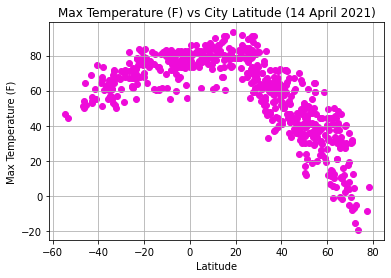

In [61]:
#creating the temp vs lat plot
plt.scatter(lat, temps, color="#ee0bd9")
#setting plot properties
plt.title("Max Temperature (F) vs City Latitude (15 April 2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#save the figure as a png file
plt.savefig("output_data/overall_max_temp_vs_lat_15April2021.png")

plt.show()

This plot is showing the distribution of the maximum temperature for a city based on the latitude the city lays on. The maximum temperature for the city decreases as the city's latitude gets further away from the equator (0).

# Humidity (%) vs. Latitude

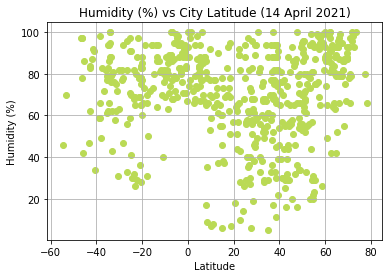

In [62]:
#creating the humidity vs lat plot
plt.scatter(lat, humids, color="#bada55")
#setting plot properties
plt.title("Humidity (%) vs City Latitude (15 April 2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#save the figure as a png file
plt.savefig("output_data/overall_humidity_vs_lat_15April2021.png")

plt.show()

This plot is showing the distribution of the humidity percentage for a city based on the latitude the city lays on. On first glance, the humidity percentage doesn't appear to correlate to the latitude of the city for this day.

# Cloudiness (%) vs. Latitude

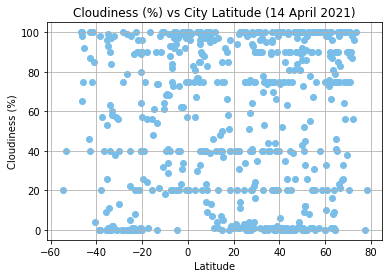

In [64]:
#creating the coludiness vs lat plot
plt.scatter(lat, clouds, color="#79bde9")
#setting plot properties
plt.title("Cloudiness (%) vs City Latitude (15 April 2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#save the figure as a png file
plt.savefig("output_data/overall_cloudiness_vs_lat_15April2021.png")

plt.show()

This plot is showing the distribution of the cloudiness percentage for a city based on the latitude the city lays on. On first glance, the cloudiness percentage doesn't appear to correlate to the latitude of the city for this day. The data points are spread all over the plot.

# Wind Speed (mph) vs. Latitude

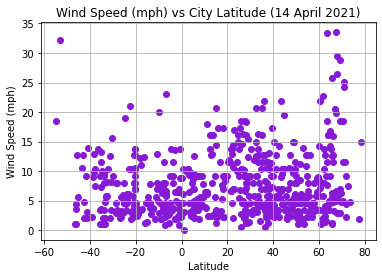

In [65]:
#creating the wind speed vs lat plot
plt.scatter(lat, windsp, color="#871ad4")
#setting plot properties
plt.title("Wind Speed (mph) vs City Latitude (15 April 2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#save the figure as a png file
plt.savefig("output_data/overall_wind_speed_vs_lat_15April2021.png")

plt.show()

This plot is showing the distribution of the wind speeds for a city based on the latitude the city lays on. The speeds are generally clustered below 15mph, but there are some extreme speeds the further the city is from the equator (0).

# Linear Regression

In [3]:
#generate northern hemisphere and southern hemisphere label with binning
bins = [-90, 0, 90]
bin_labels = ["Soutehrn Hemisphere", "Northern Hemisphere"]
#adding the column to the data frame (including lowest so that 0 is in the Northern hemisphere)
formatted_city_weather_df["Hemisphere"] = pd.cut(formatted_city_weather_df["Lat"], bins, labels=bin_labels, include_lowest=True)
formatted_city_weather_df.head()

NameError: name 'formatted_city_weather_df' is not defined